# Casos Diarios por Municipio


In [33]:
library(tidyverse)
library(ggplot2)

In [30]:
casosmun <- read_csv("Casos_Diarios_Municipio.csv")
#str(casosmun)
#length(names(casosmun))
casosmunlist<-gather(casosmun,key="dias",value="infectados",
                        4:856)
casosmunlist$dias<-as.Date(casosmunlist$dias,"%d/%m/%Y")
#str(casosmunlist)
cod_Meses <- function(x) {

labels_meses <- c(
    "Ene","Feb","Mar","Abr","May","Jun",
    "Jul","Ago","Sep","Oct","Nov","Dic")

    return(factor(x,levels = (1:12),labels = labels_meses))
    
    }

datos <- separate( data = casosmunlist,
                   col =dias,
                   into = c("año","mes","dia"),
                   sep = '-',
                   remove = FALSE)
#datos

datos<-datos%>%mutate(mest_txt=cod_Meses(as.integer(mes)))%>%mutate(consecutivo=1:2095821)
str(datos)
head(datos)


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  .default = col_double(),
  nombre = col_character()
)
i Use `spec()` for the full column specifications.



tibble[,10] [2,095,821 x 10] (S3: tbl_df/tbl/data.frame)
 $ cve_ent    : num [1:2095821] 16046 16047 16048 16049 5035 ...
 $ poblacion  : num [1:2095821] 15290 22358 5862 18769 744247 ...
 $ nombre     : chr [1:2095821] "Juarez" "Jungapeo" "Lagunillas" "Madero" ...
 $ dias       : Date[1:2095821], format: "2020-02-26" "2020-02-26" ...
 $ año        : chr [1:2095821] "2020" "2020" "2020" "2020" ...
 $ mes        : chr [1:2095821] "02" "02" "02" "02" ...
 $ dia        : chr [1:2095821] "26" "26" "26" "26" ...
 $ infectados : num [1:2095821] 0 0 0 0 0 0 0 0 0 0 ...
 $ mest_txt   : Factor w/ 12 levels "Ene","Feb","Mar",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ consecutivo: int [1:2095821] 1 2 3 4 5 6 7 8 9 10 ...


cve_ent,poblacion,nombre,dias,año,mes,dia,infectados,mest_txt,consecutivo
<dbl>,<dbl>,<chr>,<date>,<chr>,<chr>,<chr>,<dbl>,<fct>,<int>
16046,15290,Juarez,2020-02-26,2020,02,26,0,Feb,1
16047,22358,Jungapeo,2020-02-26,2020,02,26,0,Feb,2
16048,5862,Lagunillas,2020-02-26,2020,02,26,0,Feb,3
16049,18769,Madero,2020-02-26,2020,02,26,0,Feb,4
5035,744247,Torreon,2020-02-26,2020,02,26,0,Feb,5
5036,23781,Viesca,2020-02-26,2020,02,26,0,Feb,6


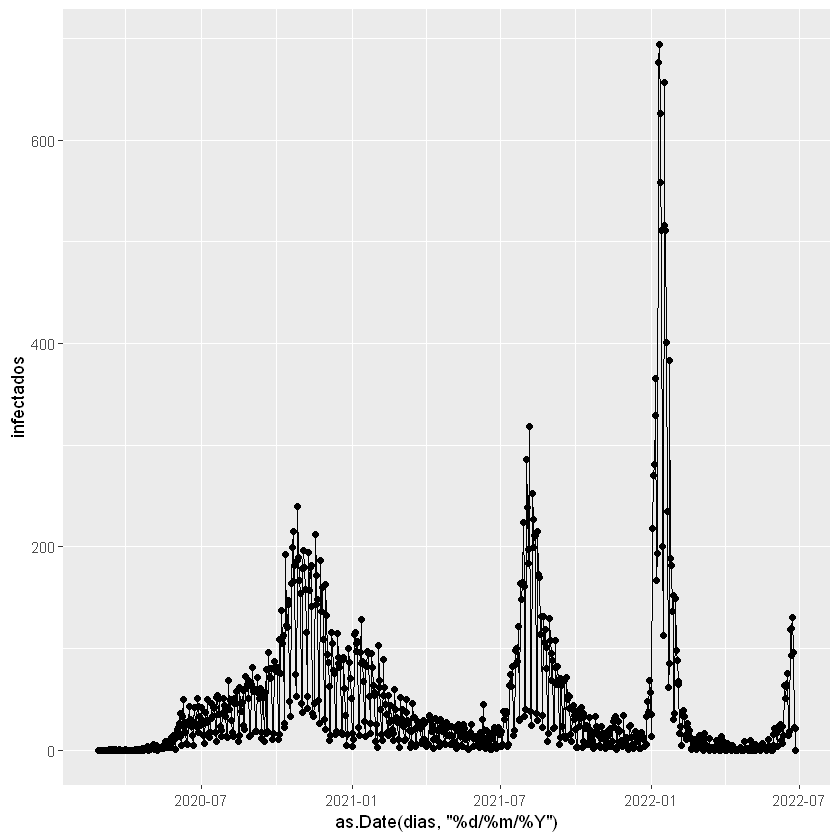

In [34]:
datos%>% filter(nombre=="Durango")%>%
        ggplot(aes(x=as.Date(dias,"%d/%m/%Y"),y=infectados))+
        geom_point()+
        geom_line()

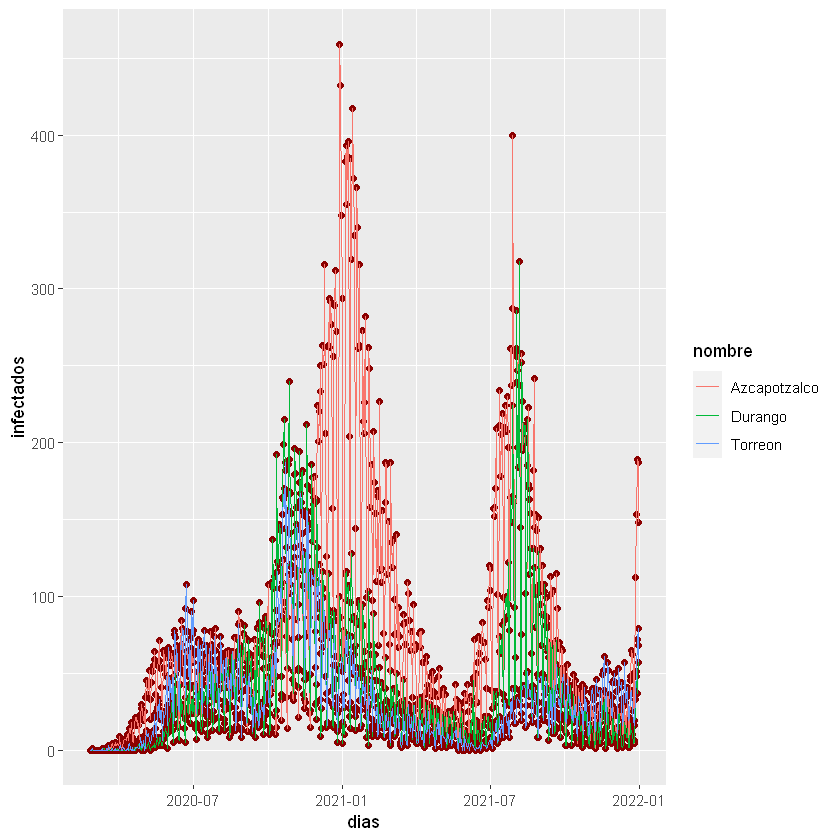

In [35]:
datos%>% filter(nombre%in%c("Durango","Torreon","Azcapotzalco"))%>%filter(año%in%c("2020","2021"))%>%
        ggplot(aes(x=dias,y=infectados,group=nombre,color=nombre))+
        geom_point(fill="#A4A4A4",color="darkred")+geom_line()#+
#        stat_smooth(method="gam",aes(x=as.Date(dias,"%d/%m/%Y"),y=infectados))+
#        coord_cartesian(xlim=c(as.Date("01/12/2020","%d/%m/%Y"),as.Date("01/02/2021","%d/%m/%Y")))

In [40]:
install.packages("gganimate")
library(gganimate)

Installing package into 'C:/Users/FelicidadPS/OneDrive/Documentos/R/win-library/4.0'
(as 'lib' is unspecified)



package 'gganimate' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\FelicidadPS\AppData\Local\Temp\Rtmp4El1Jc\downloaded_packages


In [41]:
p1<- datos%>% filter(nombre%in%c("Durango","Torreon","Azcapotzalco"))%>%filter(año%in%c("2020","2021"))%>%
        ggplot(aes(x=dias,y=infectados,group=nombre,color=nombre))+
        geom_point(fill="#A4A4A4",color="darkred")+geom_line()+
#        stat_smooth(method="gam",aes(x=as.Date(dias,"%d/%m/%Y"),y=infectados))+
        coord_cartesian(xlim=c(as.Date("01/12/2020","%d/%m/%Y"),as.Date("01/02/2021","%d/%m/%Y")))+
        transition_reveal(dias)


mi_gift2<-animate(p1,width=1600,height=800,render=gifski_renderer(loop=TRUE))
anim_save(filename="animacion2.gif")


Rendering [>-------------------------------------------] at 9.9 fps ~ eta: 10s

Rendering [>-------------------------------------------] at 9.2 fps ~ eta: 11s

Rendering [=>--------------------------------------------] at 7 fps ~ eta: 14s

Rendering [=>------------------------------------------] at 7.2 fps ~ eta: 13s

Rendering [==>-----------------------------------------] at 7.4 fps ~ eta: 13s

Rendering [==>-----------------------------------------] at 7.5 fps ~ eta: 12s

Rendering [===>----------------------------------------] at 7.6 fps ~ eta: 12s

Rendering [===>----------------------------------------] at 7.7 fps ~ eta: 12s

Rendering [===>----------------------------------------] at 7.8 fps ~ eta: 12s

Rendering [====>---------------------------------------] at 7.8 fps ~ eta: 11s

Rendering [=====>--------------------------------------] at 7.9 fps ~ eta: 11s

Rendering [=====>--------------------------------------] at 7.5 fps ~ eta: 12s

Rendering [======>---------------------